In [1]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 9.27MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [2]:
df=pd.read_csv(path+"/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

# '''
# Drops the column named 'Outcome' from the DataFrame df.The remaining columns are treated as independent features (inputs to the model).
# .values: Converts the resulting DataFrame (after dropping the column) into a NumPy array, which is often required for machine learning models.

# df['Outcome']:
# Selects the 'Outcome' column, which contains the target variable.
# .values: Converts the pandas Series into a NumPy array, as many ML models require the target variable to be in array format.

# For example, if input df is like :
#    Age  BloodPressure   BMI  Outcome
# 0   45           120  22.5        1
# 1   50           115  27.8        0
# 2   36           130  30.1        1
# 3   29           125  24.3        0

# then output will be:
# X: [[ 45.  120.   22.5]
#     [ 50.  115.   27.8]
#     [ 36.  130.   30.1]
#     [ 29.  125.   24.3]]

# y: [1 0 1 0]

# on the line of X, we will have X_train, X_test
# on the line od y, we will have y_train, y_test
# '''

If you see closely X is a 2D numpy array and y is 1D numpy array.

1.
X: Independent Features (2D Array)

Why 2D?
In a dataset, the independent features typically represent a table-like structure:

Each row represents a data point (an observation or instance, like a person).

Each column represents a feature or attribute of that data point (like Age, BloodPressure, BMI, etc.).

A 2D structure is needed because machine learning algorithms treat input features as a matrix. This structure allows algorithms to calculate weights, biases, and perform matrix operations efficiently.

2.
y: Dependent Target Feature (1D Array)

Why 1D?
The target variable (
y) is usually a single value for each data point, representing the outcome or label:

Each value in
y corresponds to a single row in X.

There’s no need for additional dimensions because it’s not a matrix but a vector of labels.

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

# '''
# split datasets into random training and testing subsets.

# Inputs:
# X: The features/independent variables of your dataset (e.g., input data like age, BMI, etc.).
# y: The target/dependent variable (e.g., Outcome).

# Outputs:
# X_train: Training set for features.
# X_test: Testing set for features.
# y_train: Training set for target.
# y_test: Testing set for target.

# Why Split the Data?
# Training the Model:

# The training set (X_train, y_train) is used to train your model.
# Testing the Model:

# The testing set (X_test, y_test) is used to evaluate the model’s performance on unseen data, ensuring it generalizes well and doesn’t just memorize the training data.
# '''

In [7]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)
print("-----------")
print("Input_dataframe shape is {}".format(df.shape))
print("X_train shape is {}".format(X_train.shape))
print("X_test shape is {}".format(X_test.shape))
print("y_train shape is {}".format(y_train.shape))
print("y_test shape is {}".format(y_test.shape))

[[  2.     84.      0.    ...   0.      0.304  21.   ]
 [  9.    112.     82.    ...  28.2     1.282  50.   ]
 [  1.    139.     46.    ...  28.7     0.654  22.   ]
 ...
 [ 10.    101.     86.    ...  45.6     1.136  38.   ]
 [  0.    141.      0.    ...  42.4     0.205  29.   ]
 [  0.    125.     96.    ...  22.5     0.262  21.   ]]
[[  6.     98.     58.    ...  34.      0.43   43.   ]
 [  2.    112.     75.    ...  35.7     0.148  21.   ]
 [  2.    108.     64.    ...  30.8     0.158  21.   ]
 ...
 [  8.     95.     72.    ...  36.8     0.485  57.   ]
 [  2.    146.     70.    ...  28.      0.337  29.   ]
 [  8.     74.     70.    ...  35.3     0.705  39.   ]]
[0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 0 0

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# '''
# 1. import torch

# This imports the core PyTorch library, which provides functionalities for:

# Tensors: Multi-dimensional arrays for numerical computations.
# GPU Support: Tensor operations can be performed on GPUs for faster computation.
# Autograd: Automatic differentiation for backpropagation.

# 2. import torch.nn as nn

# The torch.nn module provides classes for building neural networks.

# Common components available in torch.nn:
# Layers: Linear, Conv2d, LSTM, etc.
# Loss Functions: CrossEntropyLoss, MSELoss, etc.
# Containers: Sequential, ModuleList, etc.

# 3. import torch.nn.functional as F

# torch.nn.functional provides functional versions of operations (e.g., activation functions, dropout).

# Examples of operations in F:
# Activation functions: F.relu, F.sigmoid, F.softmax
# Dropout: F.dropout

# How They Work Together
# In PyTorch, you typically use torch.nn to define layers of a model and torch.nn.functional for applying operations like activations.

# '''


In [9]:
# creating Tensors

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# '''
# Explanation of the Code

# torch.FloatTensor:
# Converts the input data (e.g., X_train, X_test) to PyTorch tensors with the data type float.
# This is typically used for features, as most neural networks expect inputs to be in a floating-point format (e.g., 32-bit float).

# torch.LongTensor:
# Converts the labels (e.g., y_train, y_test) to PyTorch tensors with the data type long (integer).
# This is required for classification tasks where the labels (class indices) are integers (e.g., 0 for "No Diabetes" and 1 for "Diabetes").

# '''

Note: the initial weights in an Artificial Neural Network (ANN) are automatically assigned by PyTorch's nn.Linear() module. The coder doesn't have to manually specify them unless you want to customize the initialization.

**How nn.Linear() Assigns Initial Weights**

When you define a nn.Linear(input_features, output_features) layer, PyTorch:

Randomly initializes the weights based on a uniform or normal distribution (depending on the default initialization scheme PyTorch uses).

Sets the biases to small initial values (often zeros or very small random numbers).

**What Happens During Training?**

The model starts with these randomly assigned weights.
During backpropagation:

The loss function computes how far the predictions are from the true values.
Gradients (calculated via the chain rule) tell the model how to adjust its weights to minimize the loss.

The optimizer (like Adam or SGD) updates the weights incrementally based on the gradients.

In [10]:
# Creating models with pytorch
class ANN_Model(nn.Module):
  def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
    super().__init__()                    # Initialize the parent class
                                          # '''
                                          # nn.Module is a base class for all PyTorch neural network models. Any custom model you build in PyTorch
                                          # must inherit from this class to gain the necessary features like parameter tracking, backpropagation, etc.

                                          # The constructor initializes the model's layers. nn.Linear() is reponsible for assigning weights and bias
                                          # to the inputs

                                          # input_features=8: The number of features (columns) in your input data.
                                          # hidden1=20: The number of neurons in the first hidden layer.
                                          # hidden2=20: The number of neurons in the second hidden layer.
                                          # out_features=2: The number of output features (e.g., for binary classification, this would be 2—one for
                                          # each class).

                                          # super(ANN_Model, self).init() This line calls the init method of the parent class (nn.Module).
                                          # This is necessary to properly initialize the model and allow PyTorch to track parameters.

                                          # '''

    self.f_connected1=nn.Linear(input_features,hidden1) #fully connected dense layer 1,input_features represent the number of neurons in the input
                                                      #layer, hidden1: The number of neurons in the first hidden layer.
    self.f_connected2=nn.Linear(hidden1,hidden2) #fully connected dense layer 2,hidden1: The number of neurons in the first hidden layer,
                                               #hidden2: The number of neurons in the second hidden layer.
    self.out=nn.Linear(hidden2,out_features) #fully connected output dense layer, hidden2: The number of neurons in the second hidden layer,
                                           #This defines a fully connected (dense) layer that maps hidden2 neurons to out_features neurons.
                                           #Every neuron in the hidden2 layer (with size hidden2) is connected to every neuron in the next layer
                                           #(with size out_features). For a binary classification problem, out_features is typically 2.

                                           # Define the layers
                                           # nn.Linear() is a PyTorch function that defines a fully connected (linear) layer that connects all
                                           # neurons in the previous layer to all neurons in the current layer.

                                           #the number of features in the input corresponds to the number of neurons in the input layer. For example:
                                           #If your dataset has 8 columns (features), your input layer will have 8 neurons(input_features), one for each feature.
                                           #These 8 neurons feed data into the first hidden layer, where the number of neurons is defined by hidden1 in our example.

  def forward(self,x):      #Forward propagation
    x=F.relu(self.f_connected1(x)) # Apply ReLU activation to the first layer
    x=F.relu(self.f_connected2(x)) # Apply ReLU activation to the second layer
    x=self.out(x) # Output layer (no activation function here for now)
    return x

                                    # '''
                                    # def forward(self, x):
                                    # The forward() method defines how the input data flows through the network during both training and inference
                                    # (prediction).

                                    # x is the input data (typically a tensor).
                                    # x = F.relu(self.f_connected1(x))
                                    # This line applies the first fully connected layer (self.f_connected1) to the input data x and then applies
                                    # the ReLU activation function:

                                    # self.f_connected1(x) computes the weighted sum of the inputs and adds a bias term.
                                    # ReLU (Rectified Linear Unit) replaces all negative values in x with 0 and keeps the positive values unchanged.

                                    # x = F.relu(self.f_connected2(x))
                                    # This applies the second fully connected layer followed by the ReLU activation again.

                                    # x = self.out(x)
                                    # This applies the output layer to the data. There’s no activation function here, meaning the model will
                                    # directly output the raw scores for each class. This is typical for classification problems where you might
                                    # apply softmax later to turn the raw scores into probabilities.

                                    # return x
                                    # This returns the final output, which can then be used for further processing or evaluation.

                                    #  '''


In [11]:
### instantiate an ANN_model
torch.manual_seed(20)
model=ANN_Model()

# '''
# This creates an instance of your custom artificial neural network model (ANN_Model).

# What happens here?

# The __init__ method in your ANN_Model class is called.

# The layers (f_connected1, f_connected2, out) are initialized with random weights and biases.

# Because torch.manual_seed(20) was called earlier, the random weights and biases are consistent every time the code runs.This shows that using
# the same seed ensures same weight initialization every time.

#     understand it by an example:
#       torch.manual_seed(20)
#       model1 = ANN_Model()

#       torch.manual_seed(20)
#       model2 = ANN_Model()

#     # Check if the weights in both models are identical
#       print(torch.equal(model1.f_connected1.weight, model2.f_connected1.weight))  # Output: True

#       This shows that using the same seed ensures consistent weight initialization.


# Default Parameters:
# If you don't pass any arguments, the default values for input_features, hidden1, hidden2, and out_features (as defined in your ANN_Model class)
# will be used.

# '''

In [12]:
print(model.parameters)

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>


In [13]:
# backward propagation, define loss function, define optimizer (optimizer is used to minimise the diffence between Y and Y' i.e actual
#and predicted value.)
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)

**Explanation**

**loss_function = nn.CrossEntropyLoss()**

**Purpose:**

CrossEntropyLoss automatically:

Applies softmax to the logits.

Computes the loss using the true labels.

This defines the loss function that will measure how well the model's predictions match the true labels. The goal during training is to minimize this loss.

**Why CrossEntropyLoss?**

Use case: This loss function is used for multi-class classification problems.

**Input: It expects:**

Raw output (logits) from the final layer of the model (not probabilities).

Target labels as integers (e.g., 0 for class 0, 1 for class 1, etc.).

**How it works:**

Applies the softmax function to the logits to convert them into probabilities.

Computes the negative log likelihood of the predicted probabilities for the correct class.

Averages this value over all samples in the batch.

**Example:**

Output: The target column Outcome has two values:

0: Non-Diabetic

1: Diabetic

Goal: Predict whether a person is diabetic (1) or not (0).

**What Does CrossEntropyLoss Do?**

CrossEntropyLoss measures the difference between:

The predicted probabilities of your model (after applying softmax) for each class.

The actual true class labels.

It penalizes predictions that are far from the true label by computing the negative log-likelihood of the correct class.

**let suppose Model's Output** (Logits)(wich is input to crossentropyloss())
Suppose your model outputs the following logits for a single input sample:

logits=[1.8,0.5]

Here:

The first value (1.8) corresponds to class 0.

The second value (0.5) corresponds to class 1.

b. Softmax Converts Logits to Probabilities

Softmax is applied to these logits:
The probabilities after softmax would be
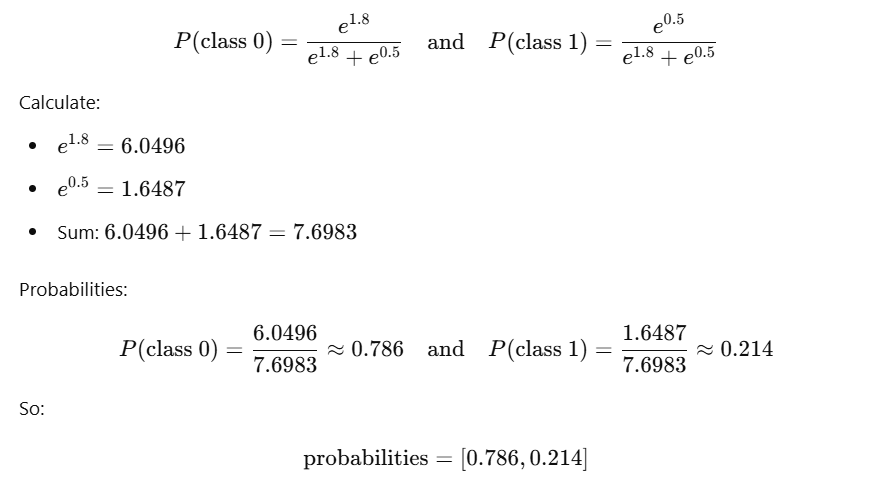

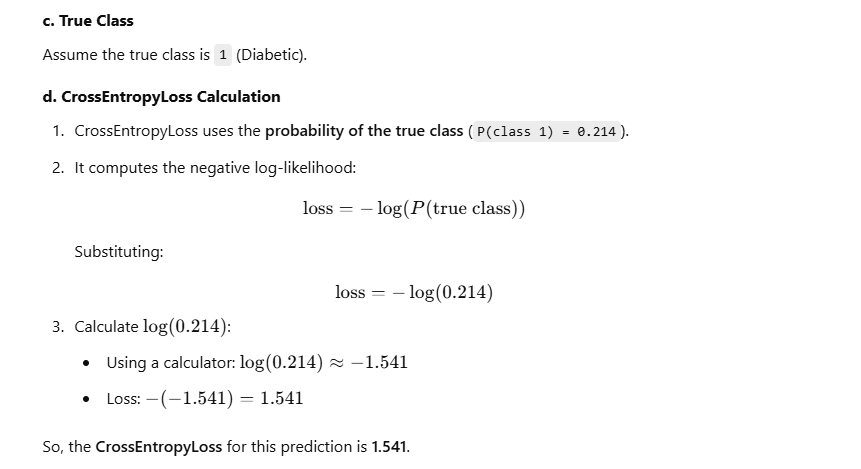

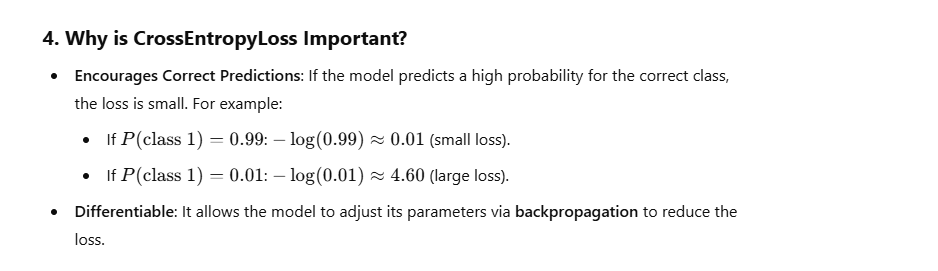


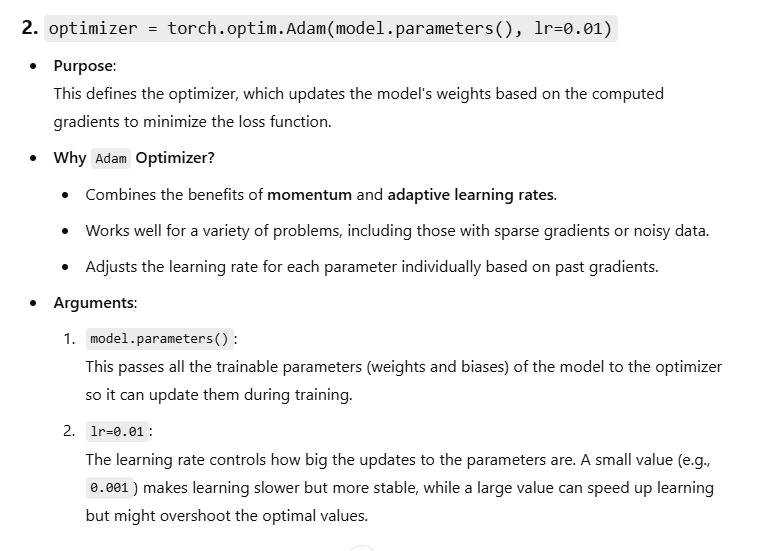

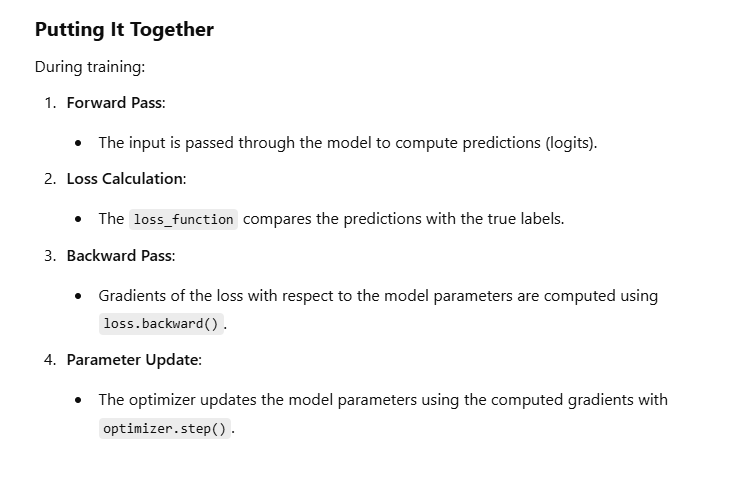

In [14]:
epoch=1500       #The model will train for 500 iterations (also known as epochs). Each epoch processes the entire training dataset once.
final_loss=[]   #This list stores the loss value at each epoch, allowing you to track how the loss decreases over time.
for i in range(epoch):
  i=i+1
  y_pred=model.forward(X_train) #The forward() function computes the predicted output (y_pred) for the training data (X_train) based on the current weights of the model.
  loss=loss_function(y_pred,y_train) #Compares the model's predictions (y_pred) with the true labels (y_train) using CrossEntropyLoss. This gives a scalar value (loss) indicating how far off the predictions are.
  final_loss.append(loss)  # The current loss is appended to the final_loss list for analysis and visualization later.
  if i%10==1:
    print("epoch number {} and loss is {}".format(i,loss.item())) # Every 10 epochs, the loss is printed to monitor the training progress. The .item() method extracts the scalar value from the loss tensor.
  optimizer.zero_grad() # Clears the gradients of all model parameters. Without this, gradients from the previous epoch would accumulate, leading to incorrect updates.
  loss.backward() # Performs backpropagation, computing gradients of the loss with respect to all weights in the model using the chain rule.
  optimizer.step() # Adjusts the weights of the model using the computed gradients and the optimization algorithm (Adam in this case).

# '''
# Key Observations
# Why Clear Gradients?
# In PyTorch, gradients accumulate by default. If you don’t call optimizer.zero_grad(), gradients will include contributions from multiple epochs.

# Why Monitor Loss?
# Tracking the loss helps ensure the model is learning. If the loss consistently decreases, the model is making progress.

# Final Model:
# After 500 epochs, the model will have updated its weights multiple times and (hopefully) learned patterns in the training data.
# '''


epoch number 1 and loss is 3.436734199523926
epoch number 11 and loss is 1.4487146139144897
epoch number 21 and loss is 0.8181182146072388
epoch number 31 and loss is 0.6896887421607971
epoch number 41 and loss is 0.6263383030891418
epoch number 51 and loss is 0.6079405546188354
epoch number 61 and loss is 0.5889647603034973
epoch number 71 and loss is 0.5799565315246582
epoch number 81 and loss is 0.5721080899238586
epoch number 91 and loss is 0.5666614770889282
epoch number 101 and loss is 0.5627107620239258
epoch number 111 and loss is 0.5593348145484924
epoch number 121 and loss is 0.5562559962272644
epoch number 131 and loss is 0.5532389879226685
epoch number 141 and loss is 0.5508192777633667
epoch number 151 and loss is 0.54857337474823
epoch number 161 and loss is 0.5465967059135437
epoch number 171 and loss is 0.5447277426719666
epoch number 181 and loss is 0.5429651737213135
epoch number 191 and loss is 0.5412659049034119
epoch number 201 and loss is 0.539516031742096
epoch n

In [40]:
# Plot the loss function
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Text(0.5, 0, 'Epoch')

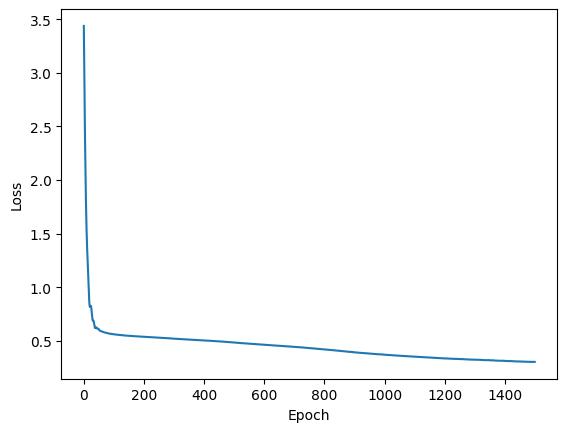

In [16]:
# Detach the gradients and convert to a list of scalar values
final_loss_values = [loss.item() for loss in final_loss]

plt.plot(range(epoch), final_loss_values) # Plot the detached loss values
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [18]:
print(X_test.shape)

torch.Size([154, 8])


In [23]:
# Prediction in X_test data
predictions=[]  # Initializes an empty list, it will store the predicted class (e.g., 0 or 1 for the diabetes dataset) for each input data point in X_test.
with torch.no_grad(): # This tells PyTorch to turn off gradient calculation during the operations inside the block. During inference (prediction),
                      # we don't need to calculate gradients because we're not updating the model's weights(i.e not doing Training).This saves memory and speeds up the computation.
  for i,data in enumerate(X_test): # Loops over the X_test data i is the index of the current data point in the X_test array. data is the actual feature data for the i-th test sample.
    y_pred=model(data) # Passes the current test data point data through the trained model (model) to get the predicted output. The model produces logits, which are raw scores before being converted into probabilities. The output y_pred is a tensor containing the logits for each class (0 or 1 in this case). E.g tensor([6.5756, 3.6800])
    predictions.append(y_pred.argmax().item()) # What it does:
                                               # y_pred.argmax() finds the index of the maximum value in y_pred (this corresponds to the predicted class).
                                               # For example, if y_pred is tensor([6.5756, 3.6800]), the maximum value is 6.5756, and its index is 0.
                                               # So the model predicts class 0.(there is only two class we are predicting in output, Class 0(non-diabetic) Class 1(diabetic)), We are picking that class whose weight is higher in predicted tensor as our final prediction.
                                               # .item() converts the PyTorch tensor (e.g., tensor(0)) to a standard Python integer.
                                               # append() adds the predicted class to the predictions list.
    print(y_pred.argmax().item())           # Prints the predicted class for the current test data point.


1
0
0
0
1
1
0
0
1
0
0
1
1
0
0
1
0
0
1
0
1
0
0
0
1
1
0
0
0
0
1
1
1
1
0
1
1
0
0
1
0
0
0
0
0
1
1
0
0
1
0
1
1
0
0
0
0
0
0
1
1
0
0
1
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
1
0
1
1
0
1
0
0
0
1
0
1
1
0
0
1
0
0
1
0
1
1
0
1
1
0
0
1
0
1
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0


In [27]:
print(predictions) # Prints the predicted class(either 0 or 1) for the current test data point.
print(len(predictions)) # it is 154, as X_test has 154 data point, and predictions list gives us the predicted class for each of those 154 data point.

[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
154


**1. True Positive (TP):**

True: The prediction matches the actual value (ground truth).

Positive: The model predicted the positive class (e.g., "Diabetic").

Example:

Actual: Diabetic (1)

Predicted: Diabetic (1)

Result: True Positive (TP)

**2. True Negative (TN):**

True: The prediction matches the actual value (ground truth).

Negative: The model predicted the negative class (e.g., "Non-Diabetic").

Example:

Actual: Non-Diabetic (0)

Predicted: Non-Diabetic (0)

Result: True Negative (TN)

**3. False Positive (FP):**

False: The prediction is incorrect (does not match the actual value).

Positive: The model predicted the positive class (e.g., "Diabetic"), but the actual value is negative.

Example:

Actual: Non-Diabetic (0)

Predicted: Diabetic (1)

Result: False Positive (FP)

This is also called a **Type I Error.**

Interpretation: The model incorrectly flagged a Non-Diabetic person as Diabetic.

**4. False Negative (FN):**

False: The prediction is incorrect (does not match the actual value).

Negative: The model predicted the negative class (e.g., "Non-Diabetic"), but
the actual value is positive.

Example:

Actual: Diabetic (1)

Predicted: Non-Diabetic (0)

Result: False Negative (FN)

This is also called a **Type II Error.**

Interpretation: The model failed to detect that a Diabetic person is Diabetic.



In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm
# This line imports the confusion_matrix function from sklearn.metrics, a library that provides tools for evaluating machine learning models.
# A confusion matrix is a table used to evaluate the performance of a classification model. It shows the counts of true positive, true negative,
# false positive, and false negative predictions.

array([[80, 19],
       [19, 36]])

cm = confusion_matrix(y_test, predictions)

y_test: This is the true target values (ground truth) for the test data. It represents the actual labels (e.g., "Diabetic" or "Non-Diabetic").

predictions: This is the list of predicted labels produced by your model during testing (created in the previous loop).

The function compares the predicted values (predictions) to the true values (y_test) and generates a confusion matrix.

Structure of the Confusion Matrix

For a binary classification (like diabetes dataset, where 0 = Non-Diabetic and 1 = Diabetic), the matrix looks like this:

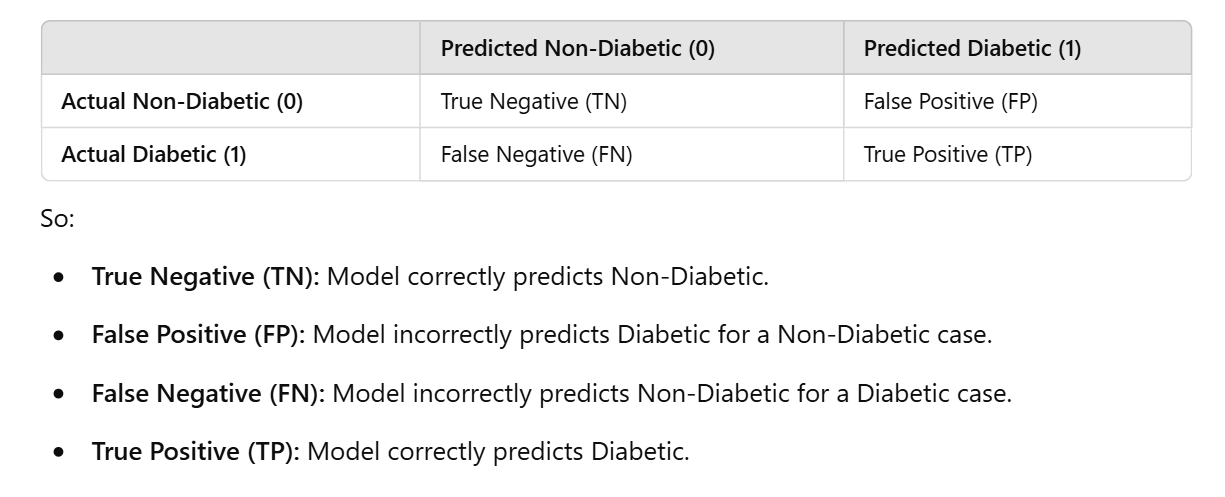

In [37]:
print("Count of True Negative is {}".format(cm[0][0]))
print("Count of False Positive is {}".format(cm[0][1]))
print("Count of False Negative is {}".format(cm[1][0]))
print("Count of True Positive is {}".format(cm[1][1]))
print("---------------------")
print("Total y_test count is {}".format(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))

Count of True Negative is 80
Count of False Positive is 19
Count of False Negative is 19
Count of True Positive is 36
---------------------
Total y_test count is 154


Text(95.72222222222221, 0.5, 'Predicted Values')

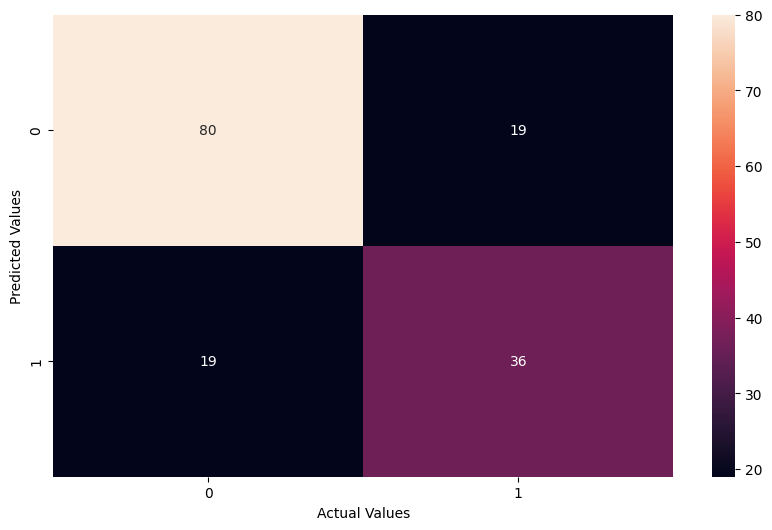

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [50]:
from sklearn.metrics import accuracy_score
# y_test is already a NumPy array, so no need to convert
y_test_np = y_test
# Convert predictions list to NumPy array if it's not already
predictions_np = np.array(predictions) if not isinstance(predictions, np.ndarray) else predictions

# Calculate accuracy score
score = accuracy_score(y_test_np, predictions_np)
print(score)

0.7532467532467533


In [51]:
#### Save the model
torch.save(model,'diabetes.pt')

In [52]:
#### Save And Load the model
model=torch.load('diabetes.pt')

<ipython-input-52-be0204bc7a79>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model=torch.load('diabetes.pt')


In [53]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [55]:
#### Predict new data using Pytorch
### lets pick first row from the input df(till second last column)
lst1=list(df.iloc[0,:-1])
print(lst1)

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]


In [56]:
# lets change some of the column values
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [57]:
new_data=torch.tensor(lst1)

In [58]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([7.0428, 7.6762])
1


#It shows that for our new input(new_data) , prediction is "Diabetic"